<a href="https://colab.research.google.com/github/vrishi220/MachineLearning/blob/master/MLhw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML - Homework 3**

In [0]:
%matplotlib inline

import cv2
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from keras import backend as K
from keras import layers, models, optimizers, utils
from keras.applications import VGG19
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from tensorflow.keras import Model

In [0]:
def pltGraph(train_generator,validation_generator):
  model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])
  history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=10,validation_data=validation_generator,validation_steps=50)
  acc,val_acc,loss,val_loss = history.history['acc'],history.history['val_acc'],history.history['loss'],history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'g^', label='Training Accuracy')
  plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
  plt.title('Training & Validation Accuracy')
  plt.legend(); plt.figure()
  plt.plot(epochs, loss, 'g^', label='Training Loss')
  plt.plot(epochs, val_loss, 'g', label='Validation Loss')
  plt.title('Training & Validation Loss')
  plt.legend(); plt.show()

In [0]:
def process_image(img_path, last_conv_layer, idx=0):
  img = image.load_img(img_path, target_size=(224, 224))
  plt.imshow(img); plt.grid(None); plt.show()
  im = preprocess_input(np.expand_dims(image.img_to_array(img), axis=0))
  preds = model.predict(im)
  itera = K.function([model.input], [K.mean(K.gradients(model.output[:, 0], last_conv_layer.output)[0], axis=(0, 1, 2)), last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = itera([im])
  heatmap = np.maximum(np.mean(conv_layer_output_value, axis=-1), 0)
  heatmap /= np.max(heatmap)
  plt.matshow(heatmap); plt.grid(None); plt.show()
  img = cv2.imread(img_path); cv2_imshow(cv2.applyColorMap(np.uint8(255 * cv2.resize(heatmap, (img.shape[1], img.shape[0]))), cv2.COLORMAP_JET) * 0.4 + img)

## **Problem 1 : Do feature extraction with data augmentation.**

--2019-04-17 12:10:39--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 2607:f8b0:4001:c0e::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   174MB/s    in 0.4s    

2019-04-17 12:10:39 (174 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 35s 352ms/step - loss: 0.5859 - acc: 0.6865 - val_loss: 0.4091 - val_acc: 0.8290
Epoch 2/10
100/100 [==============================] - 33s 326ms/step - loss: 0.4659 - acc: 0.7715 - val_loss: 0.3151 - val_acc: 0.8710
Epoch 3/10
100/100 [=======================

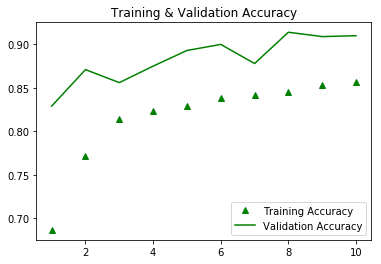

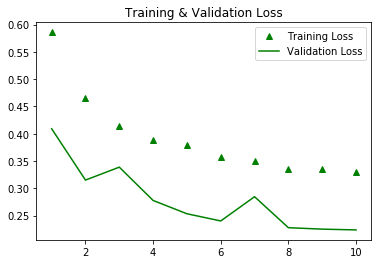

In [10]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

conv_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_base.trainable = False
for layer in conv_base.layers: layer.trainable = False
last_layer = conv_base.get_layer('block5_pool')
last_output = last_layer.output

x1 = layers.Dense(256, activation='relu')(layers.Flatten()(last_output))
x = layers.Dense(1, activation='sigmoid')(x1)

model = models.Model(conv_base.input, x)
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=0.0001), metrics=['acc'])

train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(224, 224),batch_size=20,class_mode='binary')
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(validation_dir,target_size=(224, 224),batch_size=20,class_mode='binary')

pltGraph(train_generator,validation_generator)


## **Problem 2: Do fine-tuning with data augmentation.**

Epoch 1/10
100/100 [==============================] - 35s 350ms/step - loss: 0.3058 - acc: 0.8685 - val_loss: 0.1663 - val_acc: 0.9250
Epoch 2/10
100/100 [==============================] - 32s 321ms/step - loss: 0.2402 - acc: 0.8940 - val_loss: 0.1595 - val_acc: 0.9370
Epoch 3/10
100/100 [==============================] - 33s 329ms/step - loss: 0.2139 - acc: 0.9150 - val_loss: 0.1327 - val_acc: 0.9460
Epoch 4/10
100/100 [==============================] - 33s 330ms/step - loss: 0.1772 - acc: 0.9240 - val_loss: 0.1580 - val_acc: 0.9420
Epoch 5/10
100/100 [==============================] - 33s 334ms/step - loss: 0.1834 - acc: 0.9210 - val_loss: 0.1697 - val_acc: 0.9360
Epoch 6/10
100/100 [==============================] - 32s 320ms/step - loss: 0.1812 - acc: 0.9270 - val_loss: 0.1109 - val_acc: 0.9500
Epoch 7/10
100/100 [==============================] - 33s 334ms/step - loss: 0.1526 - acc: 0.9380 - val_loss: 0.1220 - val_acc: 0.9570
Epoch 8/10
100/100 [==============================] - 3

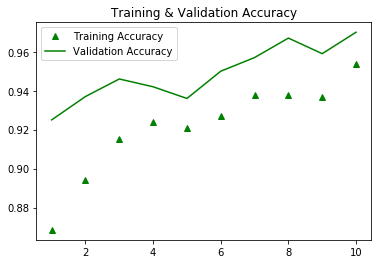

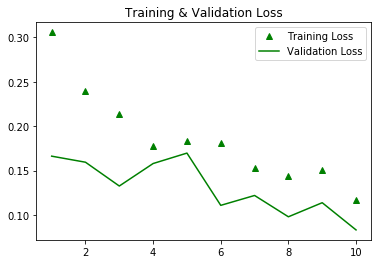

In [11]:
conv_base.trainable= True
for layer in conv_base.layers: st = True if layer.name == 'block5_conv1' else False; layer.trainable = True if st else False
pltGraph(train_generator,validation_generator)

## **Problem 3: Visualize heatmaps of class activation for the the model obtained in Problem 2. Visualization done on sample Dog and Cat.**

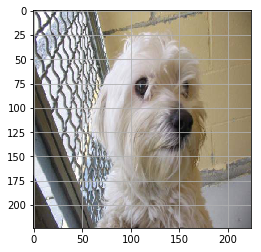

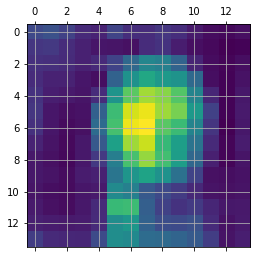

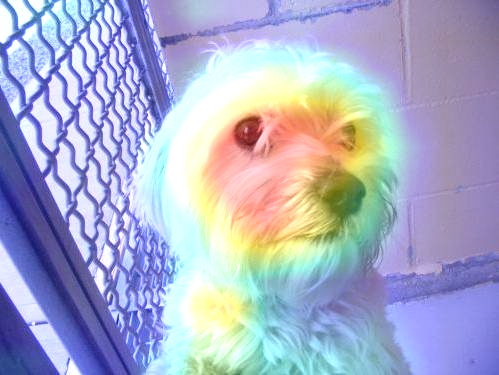

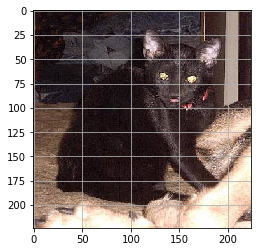

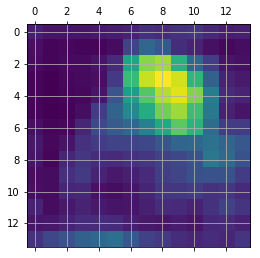

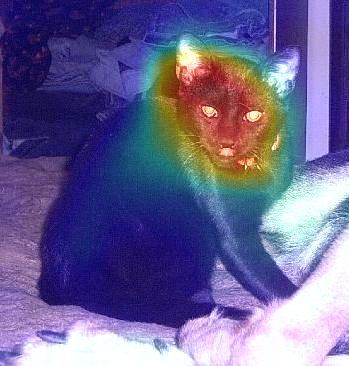

In [37]:
last_conv_layer = model.get_layer("block5_conv4")
for animal in ['dog','cat']: process_image('/tmp/cats_and_dogs_filtered/validation/' + animal + 's/' + animal + '.2005.jpg',last_conv_layer)

## **Problem 4: Build an activation model that takes as input an image and produces as output the activation of the last conv layer of the model obtained in Problem 2. Using this activation model obtain the corresponding activations for the validation images. Apply t-SNE visualization to these activations to see how well the convnet separates cats from dogs..**